<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/03-analisis-univariante-causal-multivariante/03_A___Analisis_univariante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRO: Análisis Univariante 
Explicación de cómo realizar análisis univariantes.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1WNWGnLUyiGqwFf92V3V_szu3QTD_0EQY5GZjhFgen5Q/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/03-analisis-univariante-causal-multivariante/03_A___Analisis_univariante.ipynb)




## 0101 Qué es un análisis univariante?
El análisis univariante consiste en estudiar la distribución y características de una sola variable.

Veamos con ejemplos:

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset Fifa19
Para probar a hacer análisis univariantes utilizaremos el dataframe con datos ya limpios del fifa 19 (esta es la url de la versión raw de mi archivo ya limpio 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Fifa19_Clean.csv'). Importa este dataset en un dataframe llamado **df_fifa19**.

Utiliza solo las columnas cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Work Rate', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 
        'Release Clause_€', 'Preferred Foot', 'Position', 'SprintSpeed'] y en este orden.

In [ ]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 
        'Work Rate', 'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 
        'Release Clause_€', 'Preferred Foot', 'Position', 'SprintSpeed']

# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Fifa19_Clean.csv'

# Importa csv
df_fifa19 = pd.read_csv(url, usecols=cols)

# Visualización primeras filas
df_fifa19.head()

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Work Rate,Position,SprintSpeed,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,Medium/ Medium,RF,86.0,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,High/ Low,ST,91.0,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,High/ Medium,LW,90.0,68.038800,118500000.0,290000.0,228100000.0,175.26
3,De Gea,27,Spain,91,93,Manchester United,Right,Medium/ Medium,GK,58.0,76.203456,72000000.0,260000.0,138600000.0,193.04
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,High/ High,RCM,76.0,69.853168,102000000.0,355000.0,196400000.0,180.34


# 02 Variable numérica 
Veamos cómo estudiar una variable numérica (continua).

### 0201 Método .describe()
El método .[describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) devuelve automáticamente sólo las variables numéricas, con los estadísticos básicos:


*   Count
*   Mean
*   std
*   min
*   25%
*   50%
*   75%
*   max



In [ ]:
df_fifa19.describe()

,Age,Overall,Potential,SprintSpeed,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,1.815900e+04,18159.000000,1.815900e+04,18159.000000
mean,25.122529,66.249904,71.319126,64.726967,75.286805,2.416131e+06,9752.574481,4.202278e+06,181.257584
std,4.670568,6.914613,6.134420,14.649953,7.073016,5.601319e+06,22024.397597,1.071975e+07,6.730145
min,16.000000,46.000000,48.000000,12.000000,49.895120,0.000000e+00,0.000000,0.000000e+00,154.940000
25%,21.000000,62.000000,67.000000,57.000000,69.853168,3.000000e+05,1000.000000,3.960000e+05,175.260000
50%,25.000000,66.000000,71.000000,67.000000,74.842680,6.750000e+05,3000.000000,1.000000e+06,180.340000
75%,28.000000,71.000000,75.000000,75.000000,79.832192,2.000000e+06,9000.000000,3.000000e+06,185.420000
max,45.000000,94.000000,95.000000,96.000000,110.222856,1.185000e+08,565000.000000,2.281000e+08,205.740000


## 0202 Visualización de la distribución
Los estadísticos básicos del .describe() nos dan información importante, pero suele ser más intuitivo, y muy útil, visualizar el histograma.

Recordad, podemos generar un histograma con plt.[hist()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html).

In [ ]:
sns.set()

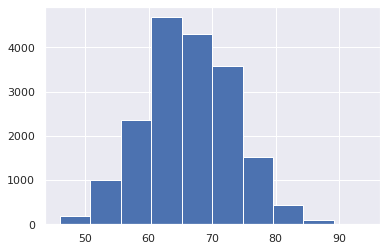

In [ ]:
# Distribución de variable 'Overall'
plt.hist(df_fifa19['Overall'])
plt.show()

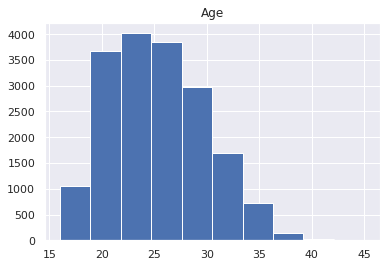

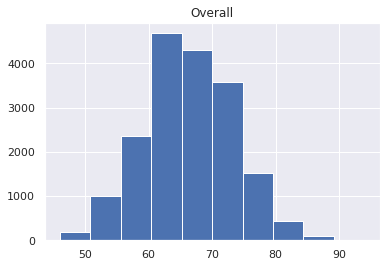

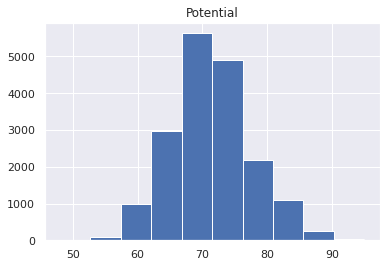

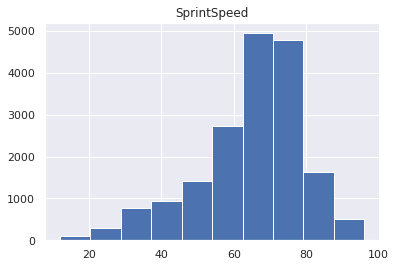

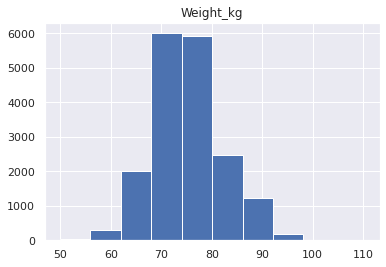

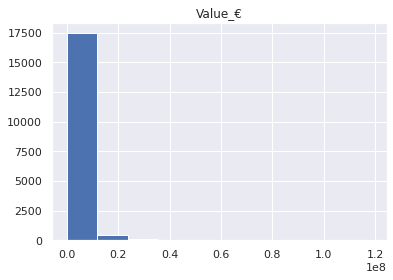

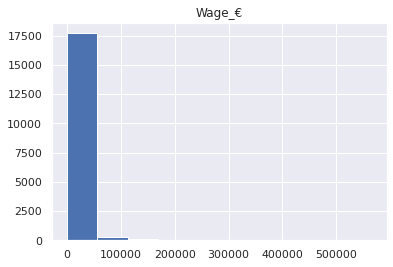

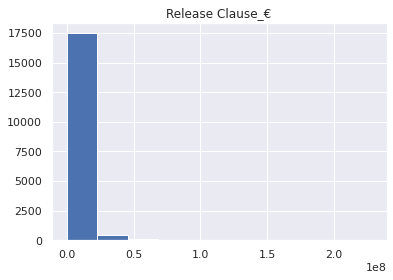

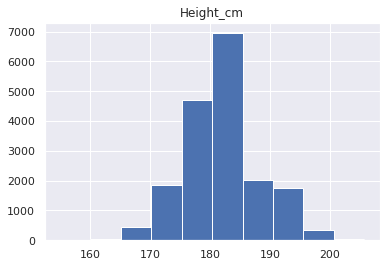

In [ ]:
# Ver distribución de todas las columnas
for columna in df_fifa19.describe().columns:
  plt.hist(df_fifa19[columna])
  plt.title(columna)
  plt.show()

# 03 Variable categórica
Vamos cómo estudiar la distribución de una variable categórica.

## 0301 Método value_counts()
El método .[value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) devuelve la frecuencia de cada categoría.

In [ ]:
df_fifa19['Nationality'].value_counts()

England                 1657
Germany                 1195
Spain                   1071
Argentina                936
France                   911
                        ... 
Lebanon                    1
São Tomé & Príncipe        1
St Lucia                   1
Rwanda                     1
United Arab Emirates       1
Name: Nationality, Length: 164, dtype: int64

In [ ]:
df_fifa19['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

## 0302 Visualización de la frecuencia
Recordemos, el método de visualización recomendado son las barras:


*   plt.[bar()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)
*   plt.[barh()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html)

Normalmente los gráficos de tarta no se recomiendan salvo en circunstancias excepcionales. Por ejemplo, cuando las categorías que se muestran son parte de un todo, el número de categorías es pequeño y saber si ciertas categorías suman más de un 50% es importante. La función plt.[pie()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html) genera un gráfico de tarta.


In [ ]:
# Guardamos el resultado del value_counts (que está en formato serie)
serie_nacionalidad = df_fifa19['Nationality'].value_counts()[:15]
serie_pie = df_fifa19['Preferred Foot'].value_counts()

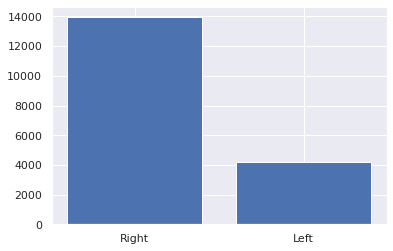

In [ ]:
# Barras verticales
plt.bar(x = serie_pie.index, height = serie_pie.values)
plt.show()

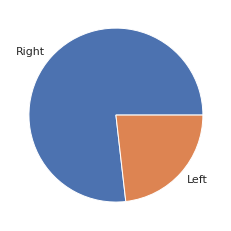

In [ ]:
# Gráfico de tarta
plt.pie(serie_pie.values, labels=serie_pie.index)
plt.show()

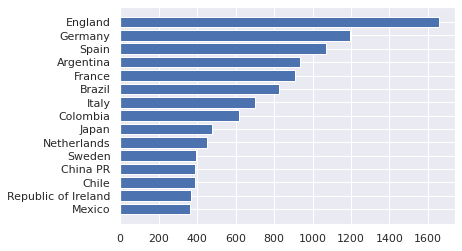

In [ ]:
# Barras horizontales
plt.barh(y = serie_nacionalidad.index, width = serie_nacionalidad.values)
plt.gca().invert_yaxis()

## 0303 EJERCICIO
Visualiza la variable categórica Posición (para las 10 posiciones más habituales) en barras horizontales.

In [ ]:
serie_posicion = df_fifa19['Position'].value_counts()[:10]
serie_posicion

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
Name: Position, dtype: int64

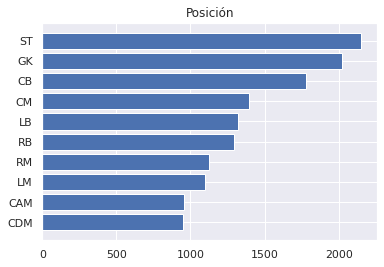

In [ ]:
# Visualización
plt.barh(y = serie_posicion.index, 
         width = serie_posicion.values)
plt.gca().invert_yaxis()
plt.title('Posición')
plt.show()